# Proyek Analisis Prediksi: CO2 Emissions by Vehicles
- **Dataset** : [CO2 Emissions by Vehicles (Kaggle)](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles/data)
- **Nama:** Nida Annisa Sholeha
- **Email:** nasa6annisa@gmail.com
- **ID Dicoding:** Nidaannisa19

# **Import Seluruh Library**
Tahap ini bertujuan untuk mengimpor seluruh pustaka (libraries) Python yang akan digunakan dalam proyek analisis data dan pemodelan machine learning ini. Setiap pustaka memiliki peran spesifik dalam memfasilitasi berbagai tahapan proyek.

In [ ]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold

# Mount Google Drive (Colab)
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Upload kaggle.json (Kaggle API credentials)
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nidaannisasholeha","key":"700c9bfdd512028105dd982798e20d9f"}'}

In [ ]:
# Setup Kaggle API authentication
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!ls -l /root/.kaggle/

total 4
-rw------- 1 root root 73 Apr 25 06:50 kaggle.json


Tahap ini bertujuan untuk mengkonfigurasi otentikasi dengan Kaggle API. Kaggle API memungkinkan pengguna untuk berinteraksi dengan data Kaggle, mengunduh dataset, berpartisipasi dalam kompetisi, dan lainnya secara programatik. Langkah-langkah ini melibatkan pembuatan direktori `.kaggle` di direktori `/root/` sebagai lokasi standar untuk file kredensial API. Perintah `!mv kaggle.json /root/.kaggle/` digunakan untuk memindahkan file `kaggle.json` yang berisi kunci API pengguna dari lokasi saat ini ke direktori `.kaggle`. Selanjutnya, perintah `!chmod 600 /root/.kaggle/kaggle.json` diterapkan untuk mengatur izin akses file `kaggle.json` menjadi hanya dapat dibaca dan ditulis oleh pemiliknya, sebagai langkah keamanan yang disarankan. Terakhir, perintah `!ls -l /root/.kaggle/` digunakan untuk memverifikasi keberhasilan pemindahan file dan memeriksa izin aksesnya.

In [ ]:
# Download dataset from kaggle
!kaggle datasets download -d debajyotipodder/co2-emission-by-vehicles

Dataset URL: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles
License(s): DbCL-1.0


In [ ]:
# Extract file .zip
!unzip co2-emission-by-vehicles.zip

Archive:  co2-emission-by-vehicles.zip
  inflating: CO2 Emissions_Canada.csv  
  inflating: Data Description.csv    


# **Data Loading**

Tahap ini bertujuannya untuk memuat dataset yang diperlukan ke dalam lingkungan kerja agar data tersebut dapat diakses dan diproses lebih lanjut. Data yang berhasil dimuat kemudian disimpan dalam struktur data yang sesuai untuk memudahkan manipulasi, eksplorasi, dan analisis pada tahapan berikutnya

In [ ]:
# Loading Dataset
df_original = pd.read_csv('/content/CO2 Emissions_Canada.csv')

In [ ]:
df_desc = pd.read_csv('/content/Data Description.csv')

In [ ]:
df = df_original.copy() # Membuat salinan dari dataset original agar perubahan yang dilakukan selama pengolahan data tidak mempengaruhi dataset asli

# **Exploratory Data Analysis**

Tahapan EDA (Exploratory Data Analysis) bertujuan memahami karakteristik dari dataset, mengidentifikasi pola, hubungan antar variabel dan visualisasi data untuk mendapatkan insight awal dataset agar dapat menjawab rumusan masalah:
1. Bagaimanakah cara melakukan prediksi emisi CO2 menggunakan model Machine Learning berdasarkan fitur seperti ukuran mesin, jenis bahan bakar dan penggunaan bahan bakar?
2. Bagaimana hubungan antar variabel fitur terhadap emisi CO2?

In [ ]:
df_desc.head() # Menampilkan 5 baris pertama dataset

,Understanding the Data,Unnamed: 1
0,Model,4WD/4X4 = Four-wheel drive
1,NaN,AWD = All-wheel drive
2,NaN,FFV = Flexible-fuel vehicle
3,NaN,SWB = Short wheelbase
4,NaN,LWB = Long wheelbase


In [ ]:
df.head() # Menampilkan 5 baris pertama dataset

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
# Menampilkan informasi tipe data tiap kolom, jumlah non-null serta ukuran data
print("Informasi dasar dataset:")
df.info()

Informasi dasar dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-n

In [ ]:
# Menampilkan statistik deskriptif dasar seperti mean, max, min, std dan lainnya untuk kolom numerik
print("Deskripsi statistik dataset:")
df.describe().T

Deskripsi statistik dataset:


,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [ ]:
# Menampilkan statistik fitur kategorikal
df.describe(include='object').T

,count,unique,top,freq
Make,7385,42,FORD,628
Model,7385,2053,F-150 FFV,32
Vehicle Class,7385,16,SUV - SMALL,1217
Transmission,7385,27,AS6,1324
Fuel Type,7385,5,X,3637


In [ ]:
# Memeriksa dan menampilkan missing value pada dataset
df.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


In [ ]:
# Memeriksa dan menampilkan jumlah duplikasi data
duplicate_rows = df.duplicated().sum()
print("Jumlah baris duplikat:", duplicate_rows)

Jumlah baris duplikat: 1103


In [ ]:
# Mengubah nama fitur 'make' menjadi 'brands'
df.rename(columns={'make': 'brands'}, inplace=True)
df.columns = df.columns.str.replace(" (L/100 km)", "", regex=False).str.replace("(L)", "", regex=False).str.replace("(g/km)", "", regex=False).str.replace(" ", "_", regex=False).str.lower()
df.columns

Index(['brands', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_(mpg)', 'co2_emissions'],
      dtype='object')

# **Visualisasi Data**

Tahapan visualisasi data dilakukan agar dapat mengidentifikasi pola dan tren pada data, deteksi outlier, distribusi data dan korelasi antar variable.

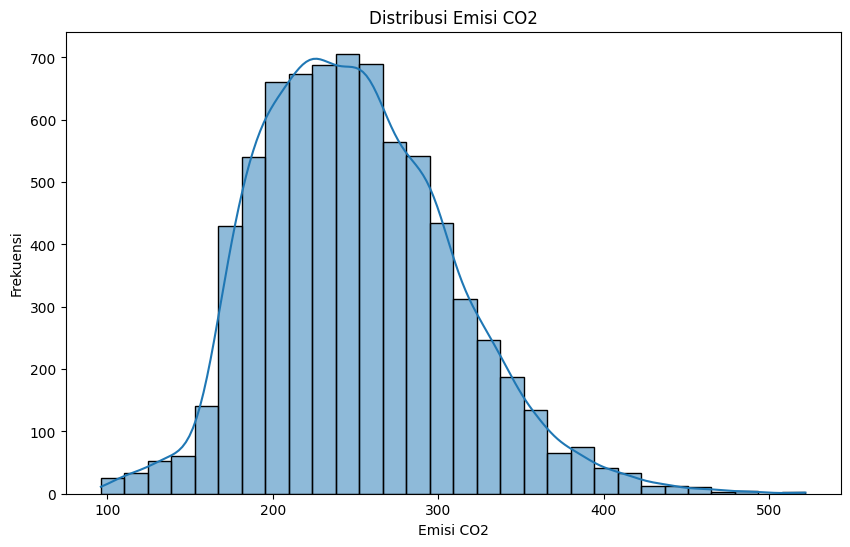

In [ ]:
# Visualisasi distribusi target (CO2 Emission)
plt.figure(figsize=(10, 6))
sns.histplot(df['co2_emissions'], bins=30, kde=True)
plt.title('Distribusi Emisi CO2')
plt.xlabel('Emisi CO2')
plt.ylabel('Frekuensi')
plt.show()

Distribusi Emisi CO2 divisualisasikan atau digambarkan dengan histogram yang menunjukkan sebagian besar kendaraan yang terdata pada dataset memiliki emisi CO2 antara 200 dan 300.

<Figure size 1200x800 with 0 Axes>

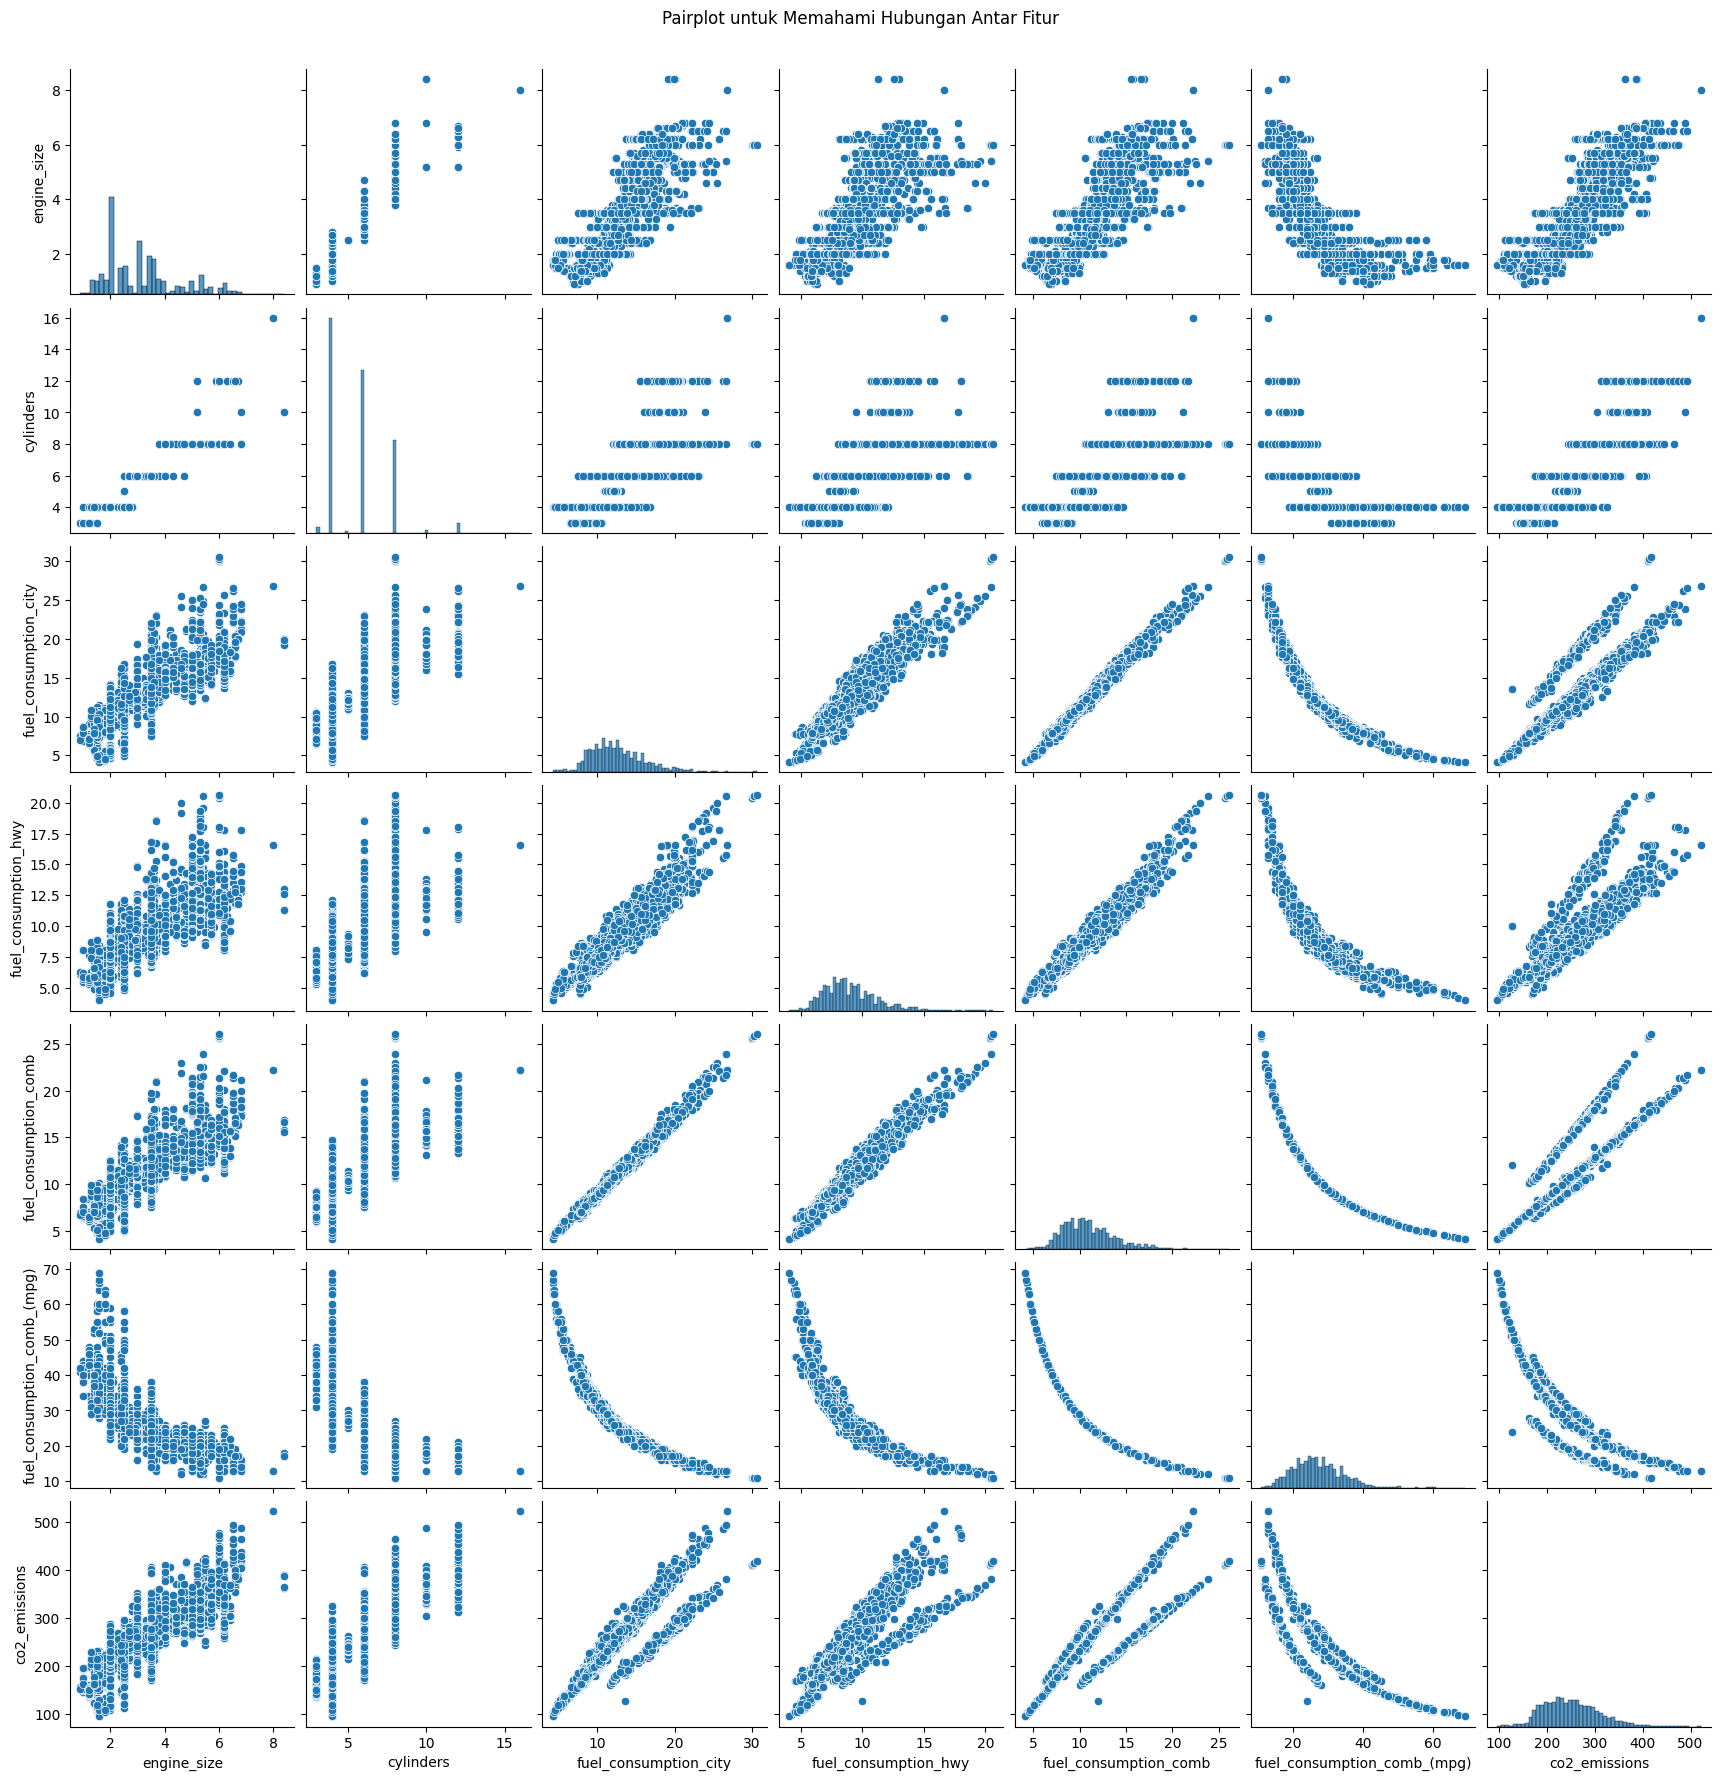

In [ ]:
# Visualisasi hubungan antara fitur dan target
plt.figure(figsize=(12, 8))
sns.pairplot(df)
plt.suptitle('Pairplot untuk Memahami Hubungan Antar Fitur', y=1.02)
plt.show()

Visualisasi pair plot  memperlihatkan hubungan antara fitur-fitur terkait konsumsi bahan bakar dan karakteristik mesin (ukuran dan jumlah silinder) dengan emisi CO2. Secara khusus:

- Konsumsi bahan bakar (dalam L/100km) berkorelasi positif kuat dengan emisi CO2: Semakin boros bahan bakar kendaraan, semakin tinggi emisinya.
- Ukuran mesin dan jumlah silinder juga berkorelasi positif dengan emisi CO2: Kendaraan dengan mesin yang lebih besar dan jumlah silinder yang lebih banyak cenderung menghasilkan emisi yang lebih tinggi.
- Efisiensi bahan bakar dalam MPG berkorelasi negatif kuat dengan emisi CO2: Semakin efisien bahan bakar kendaraan (semakin tinggi MPG), semakin rendah emisinya.

Fitur-fitur yang berkaitan dengan konsumsi bahan bakar (fuel_consumption_city, fuel_consumption_hwy, fuel_consumption_comb) dan ukuran mesin (engine_size), serta jumlah silinder (cylinders) memiliki hubungan yang kuat dengan emisi CO2. Kemungkinan fitur ini akan menjadi prediktor yang penting untuk memprediksi emisi CO2.

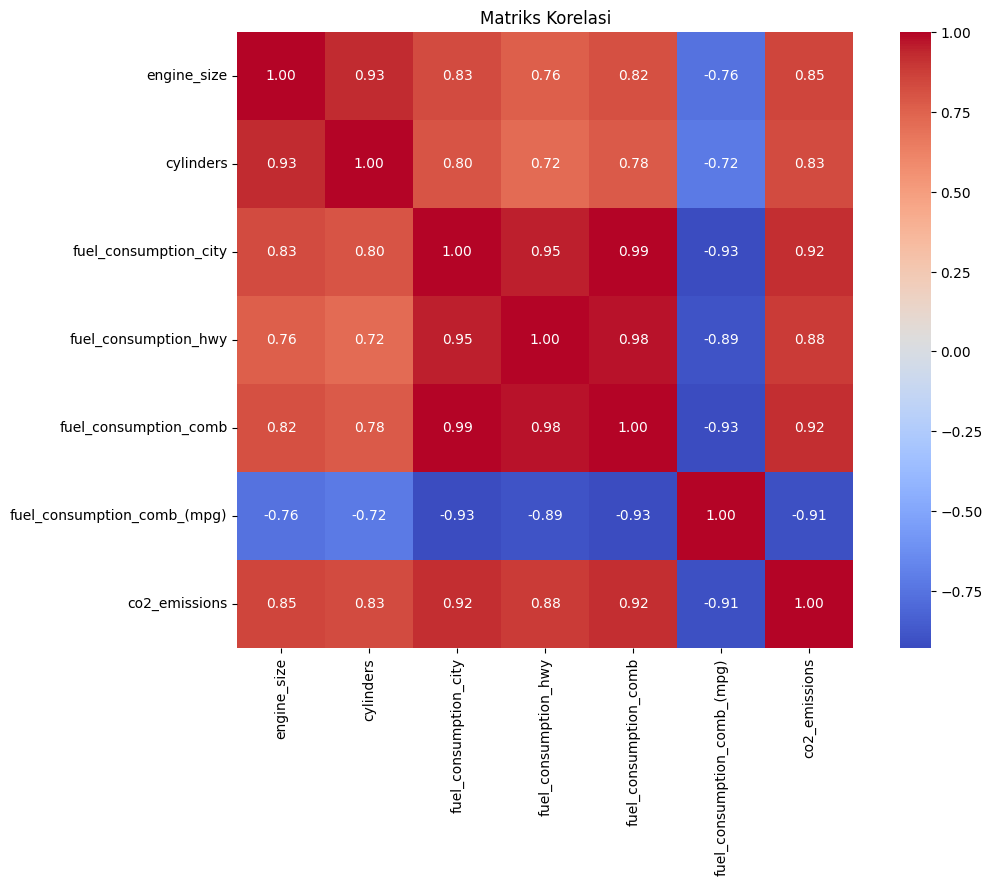

In [ ]:
# Korelasi antar fitur
numeric_df = df.select_dtypes(exclude="object")
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()


Heatmap korelasi menunjukkan hubungan yang kuat antara fitur-fitur konsumsi bahan bakar dan karakteristik mesin dengan emisi CO2.
Konsumsi bahan bakar (terutama konsumsi kombinasi dan perkotaan dalam L/100km) memiliki korelasi positif yang sangat tinggi (sekitar 0.92) dengan emisi CO2, menjadikannya indikator yang sangat kuat untuk memprediksi tingkat emisi. Sebaliknya, efisiensi bahan bakar dalam MPG memiliki korelasi negatif yang sangat kuat (-0.91) dengan emisi CO2, menunjukkan hubungan terbalik yang signifikan. Selain itu, terdapat korelasi yang sangat tinggi (di atas 0.95) antar berbagai jenis ukuran konsumsi bahan bakar dalam L/100km, yang mengindikasikan adanya multikolinearitas di antara fitur-fitur tersebut dan perlu dipertimbangkan dalam pemodelan untuk menghindari masalah stabilitas dan interpretasi model.

<ipython-input-24-97cd64ef5320>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='vehicle_class', palette='flare')


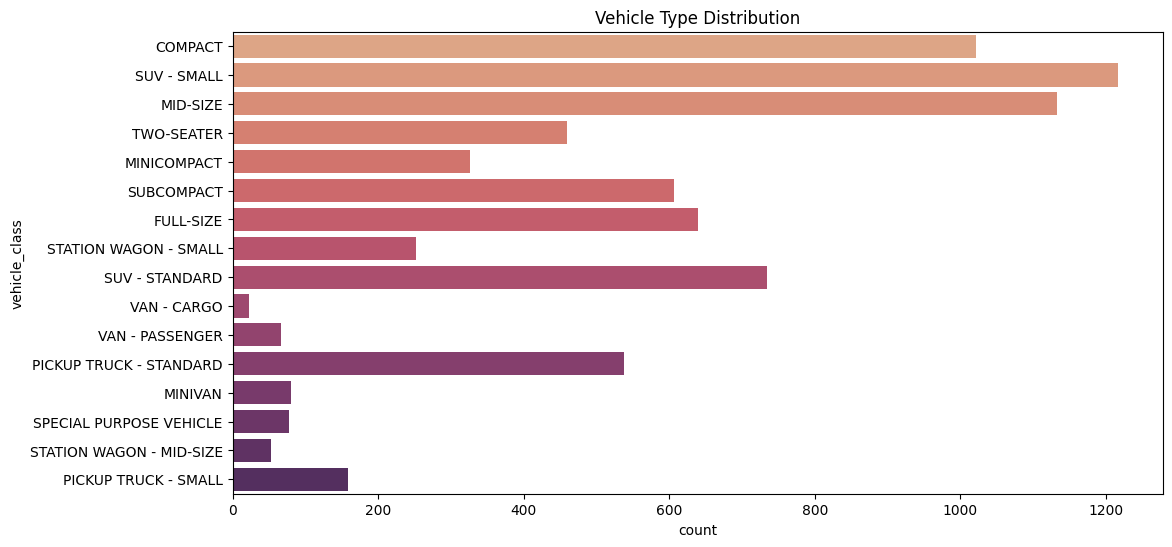

In [ ]:
# Distribusi Vehicle Class
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='vehicle_class', palette='flare')
plt.title('Vehicle Type Distribution')
plt.show()

<ipython-input-25-c298b7e0bdba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="vehicle_class", y="co2_emissions", palette="YlGn")


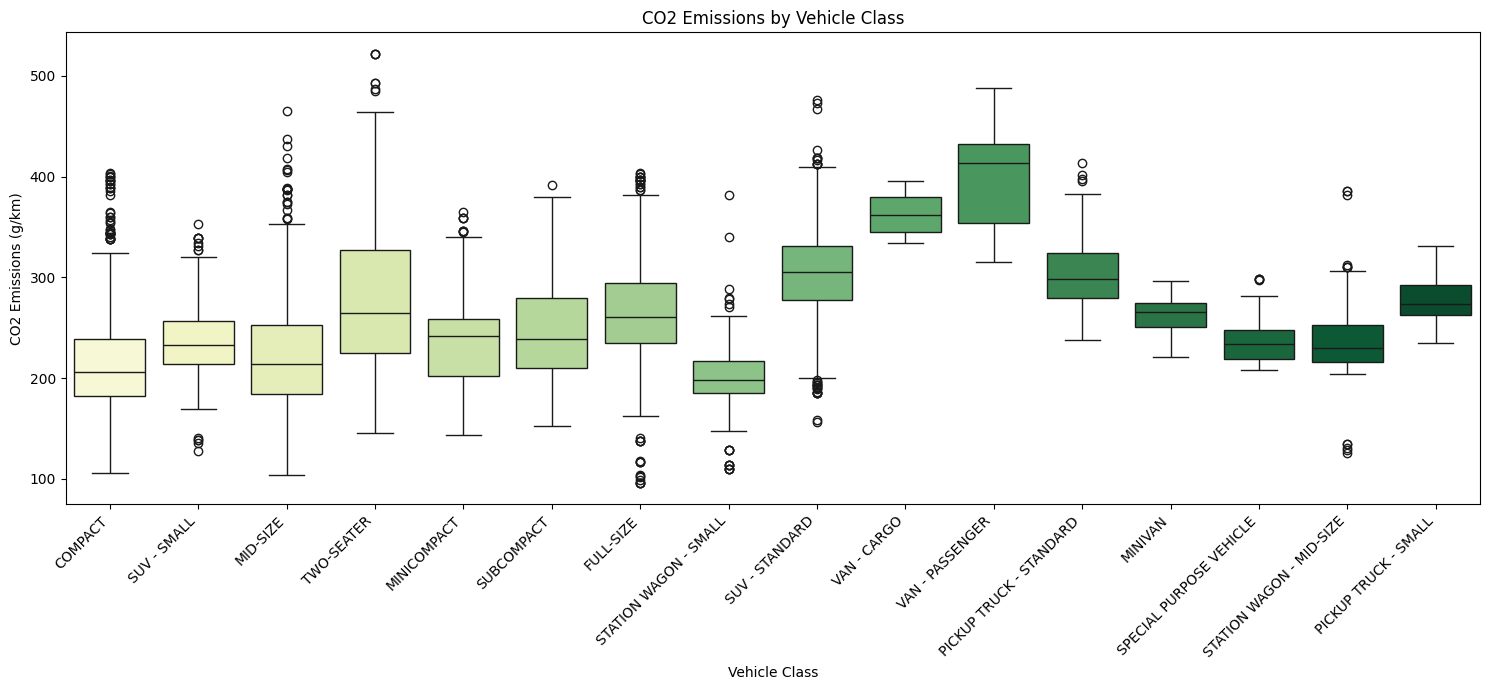

In [ ]:
#Visualisasi Emisi CO2 dengan Vehicle Class
plt.figure(figsize=(15, 7)) # Perbesar ukuran gambar
sns.boxplot(data=df, x="vehicle_class", y="co2_emissions", palette="YlGn")

plt.title("CO2 Emissions by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions (g/km)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

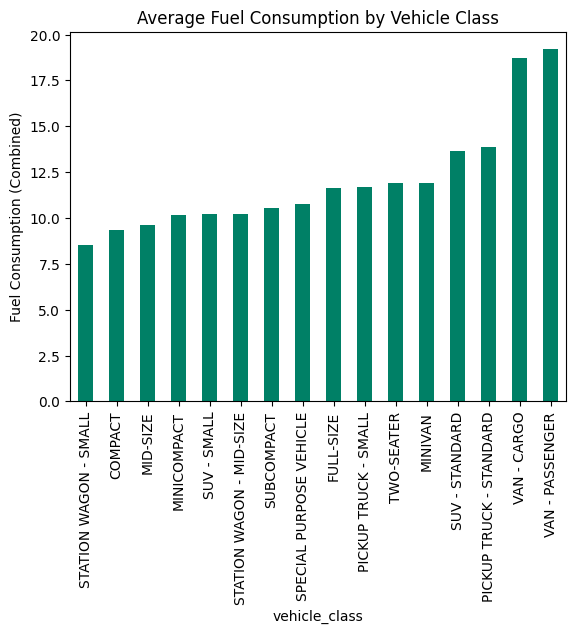

In [ ]:
# Average fuel consumption by vehicle class
avg_fuel = df.groupby('vehicle_class')['fuel_consumption_comb'].mean().sort_values()
avg_fuel.plot(kind='bar', cmap='summer')

plt.title('Average Fuel Consumption by Vehicle Class')
plt.ylabel('Fuel Consumption (Combined)')
plt.show()

Diagram batang ini memberikan informasi variasi yang signifikan dalam rata-rata konsumsi bahan bakar antar kelas kendaraan. Secara umum, kendaraan yang lebih kecil dan lebih kompak cenderung memiliki rata-rata konsumsi bahan bakar yang lebih rendah, sedangkan kendaraan yang lebih besar seperti SUV standar dan truk pikap memiliki rata-rata konsumsi bahan bakar yang jauh lebih tinggi.

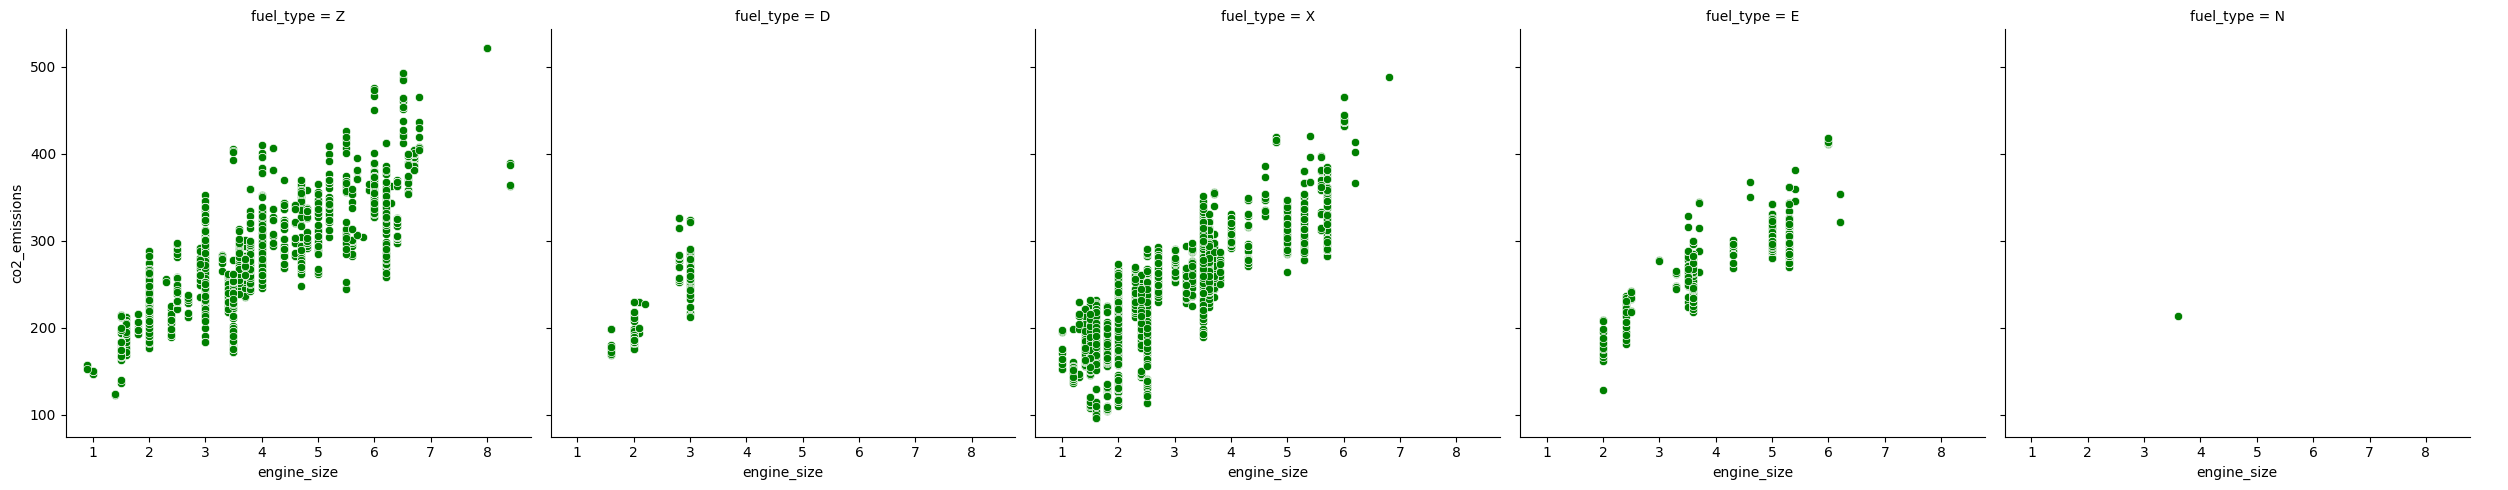

In [ ]:
# FacetGrid: Relationship between engine size and CO2 according to fuel type
g = sns.FacetGrid(df, col='fuel_type', height=5, aspect=1)
g.map(sns.scatterplot, 'engine_size', 'co2_emissions', color='green')
g.add_legend()
plt.show()

Tahapan visualisasi ini membantu kita memahami bahwa hubungan positif antara ukuran mesin dan emisi CO2 cenderung konsisten di berbagai jenis bahan bakar. Namun, tingkat emisi CO2 untuk ukuran mesin tertentu dapat bervariasi tergantung pada jenis bahan bakarnya. Jumlah data yang berbeda untuk setiap jenis bahan bakar juga menunjukkan bahwa beberapa jenis bahan bakar lebih umum atau lebih banyak direpresentasikan dalam dataset ini dibandingkan dengan yang lain. Untuk analisis yang lebih mendalam, kita perlu melihat jenis bahan bakar apa yang diwakili oleh setiap nilai numerik pada fuel_type dan mempertimbangkan jumlah data yang tersedia untuk setiap kategori.


# **Data Preparation**

Tahap ini tujuannya adalah untuk mengubah data mentah menjadi format yang sesuai, bersih, dan informatif sehingga dapat digunakan secara efektif untuk membangun dan mengevaluasi model prediksi.

In [ ]:
# Menghapus data duplikat
if duplicate_rows > 0:
  df = df.drop_duplicates()
  print("Data duplikat telah dihapus.")

Data duplikat telah dihapus.


In [ ]:
# Menghapus fitur 'model' karena kardinalitas tinggi
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
X = df.drop('co2_emissions', axis=1)
y = df['co2_emissions']

# Hapus kolom 'model' dari fitur (X)
X = X.drop('model', axis=1, errors='ignore')

<ipython-input-29-ab65bf98d36a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')


Kardinalitas tinggi dapat menyebabkan peningkatan dimensi data yang signifikan. Setelah encoding, yang dapat membebani model dan berpotensi menyebabkan overfitting. Selain itu, informasi pada level model mungkin terlalu spesifik dan kurang memberikan generalisasi yang baik dibandingkan fitur lain seperti 'make' atau spesifikasi mesin.

In [ ]:
# Mengidentifikasi kolom kategorikal setelah menghapus fitur 'model'
categorical_features = X.select_dtypes(include='object').columns
print("Fitur Kategorikal setelah menghapus 'model':", categorical_features)

Fitur Kategorikal setelah menghapus 'model': Index(['brands', 'vehicle_class', 'transmission', 'fuel_type'], dtype='object')


Tahap ini bertujuan untuk mengidentifikasi kolom-kolom dalam DataFrame X yang memiliki tipe data kategorikal (objek) setelah fitur bernama 'model' dihapus. Kolom kategorikal berisi data yang mewakili kategori atau kelompok, seperti nama merek, jenis bahan bakar, atau kelas kendaraan. Identifikasi kolom kategorikal penting karena jenis data kategoris memerlukan penanganan khusus dalam banyak algoritma machine learning (seringkali perlu diubah menjadi representasi numerik melalui proses encoding).

In [ ]:
# Mengidentifikasi kolom numerik
numerical_features = X.select_dtypes(include=np.number).columns
print("Fitur Numerikal:", numerical_features)

Fitur Numerikal: Index(['engine_size', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_(mpg)'],
      dtype='object')


Tahap ini bertujuan untuk mengidentifikasi kolom-kolom dalam DataFrame X yang memiliki tipe data numerik. Pemilihan kolom numerik dilakukan dengan menggunakan fungsi select_dtypes() dari pustaka pandas, dengan argumen include=np.number yang secara spesifik memilih kolom-kolom yang tipe datanya termasuk dalam kategori numerik yang didefinisikan oleh numpy (misalnya, integer dan float). Hasil dari pemilihan ini, yaitu daftar nama-nama kolom numerik, kemudian disimpan dalam variabel bernama numerical_features. Terakhir, isi variabel numerical_features dicetak ke layar untuk memberikan informasi mengenai fitur-fitur mana saja dalam DataFrame X yang bersifat numerik. Identifikasi ini penting untuk memisahkan penanganan fitur numerik dan kategorikal dalam tahapan pra-pemrosesan data selanjutnya.

In [ ]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Tahap ini melibatkan pemisahan dataset menjadi dua subset utama: data latih (training set) dan data uji (testing set). Fungsi train_test_split() dari modul sklearn.model_selection digunakan untuk tujuan ini. DataFrame fitur X dan Series target y menjadi input utama fungsi. Parameter test_size=0.2 menentukan bahwa 20% dari keseluruhan data akan dialokasikan sebagai data uji, sementara 80% sisanya akan digunakan sebagai data latih. Parameter random_state=42 berfungsi untuk mengontrol keacakan dalam proses pembagian data. Dengan menetapkan nilai random state, hasil pembagian akan konsisten setiap kali kode dijalankan, sehingga memungkinkan reproduktifitas eksperimen. Data latih (X_train, y_train) akan digunakan untuk melatih model machine learning, sedangkan data uji (X_test, y_test) akan digunakan untuk mengevaluasi kinerja model yang telah dilatih pada data yang belum pernah dilihat sebelumnya.

In [ ]:
print(f"Jumlah data latih (target): {y_train.count()}")
print(f"Jumlah data test (target): {y_test.count()}")

Jumlah data latih (target): 5025
Jumlah data test (target): 1257


# **Data Encoding**

- Data Encoding dilakukan setelah memisahkan data train dan data test. Encoding yang dilakukan menggunakan ColumnTransformer untuk menerapkan transformasi yang berbeda pada kolom yang berbeda pada data setelah fitur 'model' dihapus.
- Encoder OneHotEncoder diterapkan pada fitur-fitur kategorikal untuk mengubahnya menjadi format numerik yang dapat dipahami oleh model machine learning.

In [ ]:
# Menggunakan ColumnTransformer untuk menerapkan transformasi yang berbeda pada kolom yang berbeda
preprocessor_drop_model = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)],
    remainder='drop')

X_train_processed_drop = preprocessor_drop_model.fit_transform(X_train)
X_test_processed_drop = preprocessor_drop_model.transform(X_test)

In [ ]:
# Mengubah hasil encoding menjadi DataFrame agar lebih mudah diperiksa
feature_names_cat = preprocessor_drop_model.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names_processed_drop = list(feature_names_cat) + list(numerical_features)

X_train_processed_drop_dense = X_train_processed_drop.toarray()
X_test_processed_drop_dense = X_test_processed_drop.toarray()

X_train_processed_drop_df = pd.DataFrame(X_train_processed_drop_dense, columns=feature_names_processed_drop)
X_test_processed_drop_df = pd.DataFrame(X_test_processed_drop_dense, columns=feature_names_processed_drop)

In [ ]:
# Standardisasi Fitur Numerik untuk model KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed_drop_df)
X_test_scaled = scaler.transform(X_test_processed_drop_df)

# Ubah kembali ke DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_processed_drop_df.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_processed_drop_df.columns)

In [ ]:
# Mencetak beberapa baris pertama dari DataFrame data latih dan data uji yang sudah diproses
print("\nData Latih yang Sudah Diproses (tanpa fitur 'model'):")
print(X_train_processed_drop_df.head())

print("\nData Uji yang Sudah Diproses (tanpa fitur 'model'):")
print(X_test_processed_drop_df.head())

# Mencetak bentuk (jumlah baris dan kolom) dari DataFrame data latih dan data uji untuk memverifikasi dimensi data setelah encoding.
print("\nBentuk X_train_processed_drop_df:", X_train_processed_drop_df.shape)
print("Bentuk X_test_processed_drop_df:", X_test_processed_drop_df.shape)
print("Jumlah kolom pada DataFrame:", len(X_train_processed_drop_df.columns))


Data Latih yang Sudah Diproses (tanpa fitur 'model'):
   brands_ACURA  brands_ALFA ROMEO  brands_ASTON MARTIN  brands_AUDI  \
0           0.0                0.0                  0.0          0.0   
1           0.0                0.0                  0.0          0.0   
2           0.0                0.0                  0.0          0.0   
3           0.0                0.0                  0.0          0.0   
4           0.0                0.0                  0.0          0.0   

   brands_BENTLEY  brands_BMW  brands_BUGATTI  brands_BUICK  brands_CADILLAC  \
0             0.0         1.0             0.0           0.0              0.0   
1             0.0         1.0             0.0           0.0              0.0   
2             0.0         0.0             0.0           0.0              0.0   
3             0.0         0.0             0.0           0.0              0.0   
4             0.0         0.0             0.0           0.0              0.0   

   brands_CHEVROLET  ...  fuel_

# **Model Development**

Tujuan tahap ini untuk membangun model machine learning yang mampu membuat prediksi yang akurat dan dapat diandalkan pada data baru yang belum pernah dilihat sebelumnya.

In [ ]:
# Model 1: Linear Regression
linear_model_drop = LinearRegression()
linear_model_drop.fit(X_train_processed_drop_df, y_train)
y_pred_linear_drop = linear_model_drop.predict(X_test_processed_drop_df)

**Linear Regression** adalah model yang berusaha memprediksi emisi CO2 berdasarkan **hubungan linear dengan fitur-fitur**. Model ini diinisialisasi dengan *LinearRegression()* dari scikit-learn, yang secara otomatis menggunakan metode Ordinary Least Squares (OLS) untuk menemukan koefisien terbaik. Parameter utama yang sering digunakan adalah fit_intercept (secara default True untuk memperkirakan konstanta).

- Kelebihan: Interpretasi koefisien mudah, implementasi sederhana, dan komputasi cepat.
- Kekurangan: Mengasumsikan hubungan linear, sensitif terhadap outlier, dan tidak otomatis menangkap interaksi kompleks antar fitur.

In [ ]:
# Model 2: Decision Tree Regressor
tree_model_drop = DecisionTreeRegressor(random_state=42)
tree_model_drop.fit(X_train_processed_drop_df, y_train)
y_pred_tree_drop = tree_model_drop.predict(X_test_processed_drop_df)

**Decision Tree Regressor** adalah model yang memprediksi emisi CO2 dengan membuat serangkaian keputusan berdasarkan nilai fitur. Model ini diinisialisasi dengan *DecisionTreeRegressor(random_state=42)* dari scikit-learn. Parameter random_state digunakan untuk memastikan hasil yang dapat direproduksi. Model dilatih menggunakan data latih (X_train_processed_drop_df dan y_train) dan kemudian digunakan untuk memprediksi emisi pada data uji (X_test_processed_drop_df).
- Kelebihan:
   - Dapat Menangani Non-Linearitas: Mampu memodelkan hubungan yang kompleks dan non-linier antara fitur dan emisi.
   - Interpretasi Relatif Mudah: Struktur pohon dapat divisualisasikan dan aturan keputusan dapat dipahami.
   - Tidak Membutuhkan Penskalanaan Fitur: Kurang sensitif terhadap perbedaan skala antar fitur.
   - Dapat Menangani Fitur Kategorikal dan Numerik: Dapat bekerja dengan kedua jenis fitur tanpa memerlukan encoding khusus (tergantung implementasi).
- Kekurangan:
    - Rentan terhadap Overfitting: Pohon yang dalam dapat terlalu cocok dengan data latih dan gagal melakukan generalisasi dengan baik pada data baru.
   - Tidak Stabil: Perubahan kecil dalam data latih dapat menghasilkan struktur pohon yang sangat berbeda.
   - Kurang Efisien untuk Hubungan Linear Halus: Mungkin tidak seefisien regresi linear untuk hubungan yang benar-benar linier.


In [ ]:
# Model 3: Random Forest Regressor (dengan parameter terbaik dari eksperimen)
best_forest_model = RandomForestRegressor(
    n_estimators=200,  # Pilih antara 50, 100, atau 200 berdasarkan preferensi waktu
    max_depth=None,
    random_state=42  # Untuk hasil yang dapat direproduksi
)

# Latih model pada data latih yang telah diproses
best_forest_model.fit(X_train_processed_drop_df, y_train)

# Lakukan prediksi pada data uji yang telah diproses
y_pred_best_forest = best_forest_model.predict(X_test_processed_drop_df)

**Random Forest Regressor** adalah model ensemble yang menggunakan banyak decision tree untuk memprediksi emisi CO2 dengan parameter terbaik: n_estimators=200, max_depth=None, dan random_state=42.

**Kelebihan:** Akurasi tinggi, mengurangi overfitting karena banyak pohon, dapat memodelkan hubungan non-linier, memberikan estimasi pentingnya fitur, robust terhadap outlier, dan tidak terlalu butuh penskalaan fitur.

**Kekurangan:** Kurang interpretatif karena banyak pohon, butuh lebih banyak komputasi, berpotensi overfitting jika parameter tidak tepat, dan prediksi bisa kurang halus.

Model ini dilatih pada data latih yang diproses dan digunakan untuk prediksi pada data uji. Evaluasi (opsional dengan MSE dan R-squared) mengukur kinerja model terbaik ini, yang kini siap digunakan untuk prediksi lebih lanjut.

In [ ]:
# Model 4: Gradient Boosting Regressor

gb_model_drop = GradientBoostingRegressor(random_state=42)
gb_model_drop.fit(X_train_processed_drop_df, y_train)

y_pred_gb_drop = gb_model_drop.predict(X_test_processed_drop_df)

**Gradient Boosting Regressor** adalah model ensemble lain yang secara iteratif membangun decision tree, dengan setiap pohon berusaha memperbaiki kesalahan dari pohon sebelumnya. Model ini diinisialisasi dengan *GradientBoostingRegressor(random_state=42)* dari scikit-learn. Parameter random_state digunakan untuk memastikan hasil yang dapat direproduksi. Model dilatih menggunakan data latih yang telah diproses (X_train_processed_drop_df dan y_train) dan kemudian digunakan untuk memprediksi emisi pada data uji (X_test_processed_drop_df).

**Kelebihan:** Akurasi sangat tinggi, dapat menangani hubungan non-linier dan interaksi fitur, fleksibel dengan berbagai fungsi loss.

**Kekurangan:** Rentan overfitting jika tidak diatur dengan baik (perlu tuning parameter), lebih sulit diinterpretasikan, membutuhkan lebih banyak waktu pelatihan.

In [ ]:
# Model 5 : K-Nearest Neighbor (KNN)

# Inisialisasi Model KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5) # Kita mulai dengan K=5, bisa dieksperimen
knn_model.fit(X_train_scaled_df, y_train)

# Melakukan Prediksi pada Data Uji
y_pred_knn = knn_model.predict(X_test_scaled_df)

**K-Nearest Neighbor** memprediksi nilai emisi CO2 untuk mobil baru dengan melihat k mobil yang paling mirip dengannya dalam data pelatihan (berdasarkan fitur-fitur). Prediksi dilakukan dengan mengambil rata-rata emisi CO2 dari k mobil tetangga terdekat tersebut. Penting untuk memastikan fitur-fitur memiliki skala yang sama agar perhitungan kemiripan akurat. Nilai k (jumlah tetangga) perlu dipilih dengan hati-hati karena mempengaruhi hasil prediksi.

**Kelebihan:** Sederhana dan mudah diimplementasikan, tidak membuat asumsi tentang data (non-parametrik), dapat menangkap hubungan non-linier lokal.

**Kekurangan:** Sensitif terhadap skala fitur (perlu penskalaan), pemilihan k yang optimal sulit, mahal secara komputasi untuk dataset besar, rentan terhadap data yang tidak seimbang, interpretasi prediksi kurang jelas.

# **Evaluation**

- Bagian ini akan fokus pada evaluasi performa model-model prediksi emisi CO2 yang telah dikembangkan. Dengan menggunakan metrik evaluasi standar seperti Mean Squared Error (MSE) dan R-squared (R²), kita akan menganalisis seberapa akurat model-model tersebut dalam memprediksi emisi pada data uji. Hasil evaluasi ini akan memberikan wawasan penting mengenai kualitas prediksi dari setiap model.

In [ ]:
# Evaluasi Model 1 : Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear_drop)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear_drop)
r2_linear = r2_score(y_test, y_pred_linear_drop)

print("\nEvaluasi Model Linear Regression:")
print(f"MSE: {mse_linear:.4f}")
print(f"RMSE: {rmse_linear:.4f}")
print(f"MAE: {mae_linear:.4f}")
print(f"R-squared: {r2_linear:.4f}")


Evaluasi Model Linear Regression:
MSE: 29.6009
RMSE: 5.4407
MAE: 3.1965
R-squared: 0.9918


In [ ]:
# Evaluasi Model 2 : Decision Tree
mse_tree = mean_squared_error(y_test, y_pred_tree_drop)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree_drop)
r2_tree = r2_score(y_test, y_pred_tree_drop)

print("\nEvaluasi Model Decision Tree Regressor:")
print(f"MSE: {mse_tree:.4f}")
print(f"RMSE: {rmse_tree:.4f}")
print(f"MAE: {mae_tree:.4f}")
print(f"R-squared: {r2_tree:.4f}")


Evaluasi Model Decision Tree Regressor:
MSE: 20.2199
RMSE: 4.4967
MAE: 2.1090
R-squared: 0.9944


In [ ]:
# Evaluasi Model 3 : Random Forest
mse_best_forest = mean_squared_error(y_test, y_pred_best_forest)
r2_best_forest = r2_score(y_test, y_pred_best_forest)

print("\nEvaluasi Model Random Forest Terbaik:")
print(f"MSE: {mse_best_forest:.4f}")
print(f"R2: {r2_best_forest:.4f}")


Evaluasi Model Random Forest Terbaik:
MSE: 14.4646
R2: 0.9960


In [ ]:
# Evaluasi Model 4 :Gradient Boosting Regressor
mse_gb = mean_squared_error(y_test, y_pred_gb_drop)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb_drop)
r2_gb = r2_score(y_test, y_pred_gb_drop)

print("\nEvaluasi Model Gradient Boosting Regressor:")
print(f"MSE: {mse_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"MAE: {mae_gb:.4f}")
print(f"R-squared: {r2_gb:.4f}")


Evaluasi Model Gradient Boosting Regressor:
MSE: 18.2866
RMSE: 4.2763
MAE: 2.6943
R-squared: 0.9949


In [ ]:
# Evaluasi Model 5: KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nEvaluasi Model K-Nearest Neighbors (K=5):")
print(f"MSE: {mse_knn:.4f}")
print(f"R2: {r2_knn:.4f}")


Evaluasi Model K-Nearest Neighbors (K=5):
MSE: 245.3313
R2: 0.9320


# **Visualisasi Evaluasi antar Algoritma**

Tahapan ini bertujuan membandingkan kinerja setiap algoritma yang telah dibuat secara visual.

In [ ]:
# Nama-nama algoritma
algorithms = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN']

# Nilai MSE untuk setiap algoritma
mse_values = [mse_linear, mse_tree, mse_best_forest, mse_gb, mse_knn]

# Nilai R-squared untuk setiap algoritma
r2_values = [r2_linear, r2_tree, r2_best_forest, r2_gb, r2_knn]

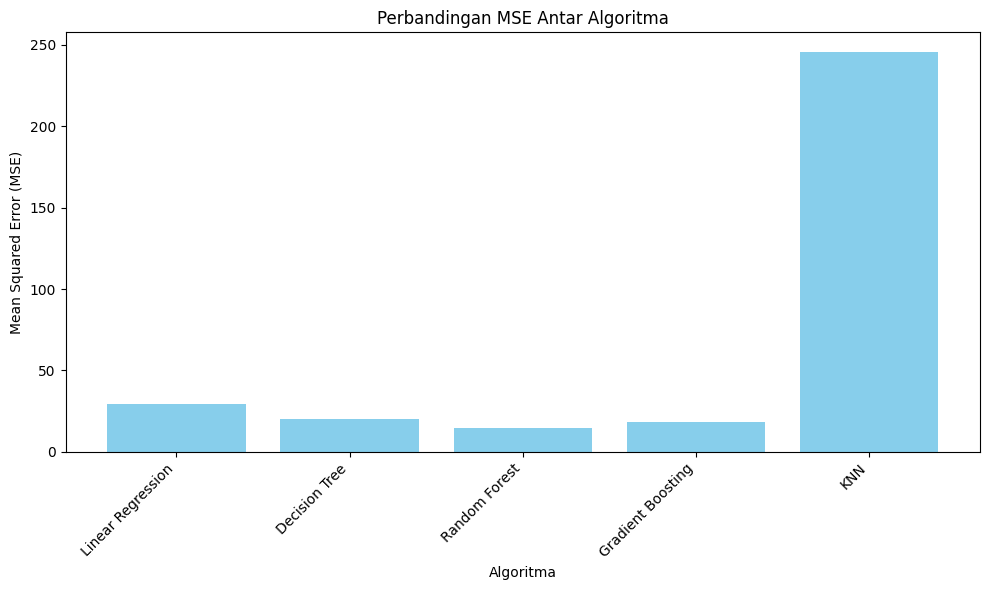

In [ ]:
# Membuat diagram batang untuk MSE
plt.figure(figsize=(10, 6))
plt.bar(algorithms, mse_values, color='skyblue')
plt.xlabel("Algoritma")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Perbandingan MSE Antar Algoritma")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

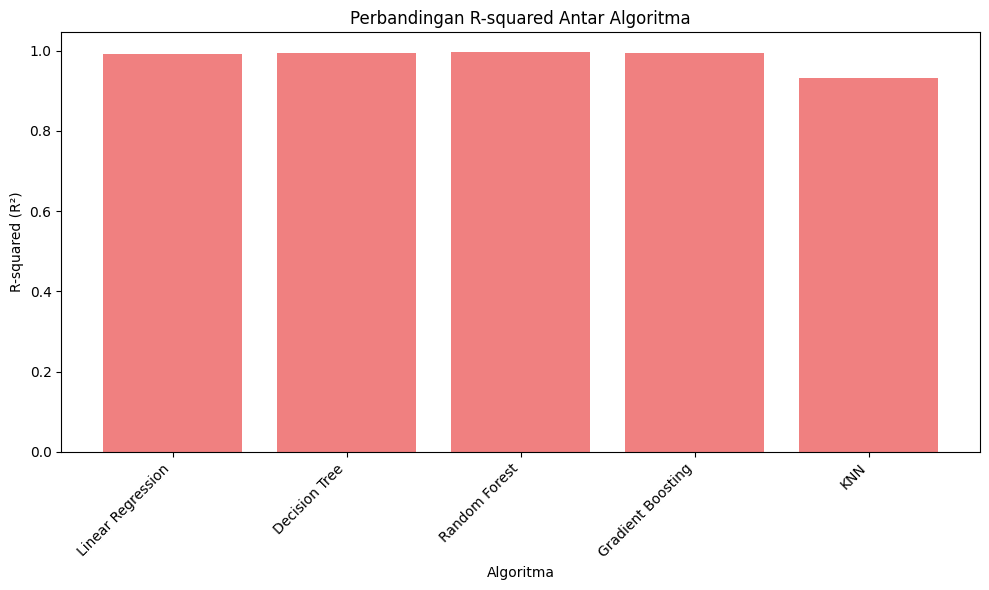

In [ ]:
# Membuat diagram batang untuk R-squared
plt.figure(figsize=(10, 6))
plt.bar(algorithms, r2_values, color='lightcoral')
plt.xlabel("Algoritma")
plt.ylabel("R-squared (R²)")
plt.title("Perbandingan R-squared Antar Algoritma")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Penjelasan:**

- Setelah melalui serangkaian eksperimen dan evaluasi terhadap berbagai algoritma regresi, termasuk Linear Regression, Decision Tree, Random Forest, Gradient Boosting, dan K-Nearest Neighbors (KNN), **Gradient Boosting Regressor** terpilih sebagai model yang paling menjanjikan untuk memprediksi emisi CO2 kendaraan.

- Keputusan ini didasarkan pada kinerja superior Gradient Boosting dalam dua metrik evaluasi utama: Mean Squared Error (MSE) dan R-squared (R²). Nilai MSE yang rendah menunjukkan bahwa prediksi emisi CO2 oleh model ini memiliki tingkat kesalahan kuadrat rata-rata yang minimal, yang berarti prediksi cenderung sangat dekat dengan nilai sebenarnya. Sementara itu, nilai R-squared yang tinggi mengindikasikan bahwa model ini mampu menjelaskan sebagian besar variasi dalam data emisi CO2, menandakan pemahaman yang baik terhadap hubungan antara fitur-fitur kendaraan dan tingkat emisinya.

- Keunggulan Gradient Boosting terletak pada pendekatannya yang iteratif dalam membangun model ensemble. Dengan menggabungkan kekuatan banyak model yang lebih sederhana (biasanya decision tree) dan secara bertahap memperbaiki kesalahan prediksi, Gradient Boosting mampu menangkap pola-pola kompleks dan hubungan non-linear dalam data yang mungkin terlewatkan oleh model tunggal seperti Linear Regression atau Decision Tree. Meskipun Random Forest juga merupakan teknik ensemble yang kuat, hasil evaluasi menunjukkan bahwa mekanisme boosting dalam Gradient Boosting memberikan keunggulan spesifik untuk tugas prediksi emisi CO2 ini.

- Sebaliknya, model KNN menunjukkan kinerja yang kurang memuaskan, terutama dalam hal MSE yang tinggi, mengindikasikan error prediksi yang lebih besar. Sementara Linear Regression dan Decision Tree memberikan hasil yang lebih baik dari KNN, mereka tidak mencapai tingkat akurasi dan kemampuan penjelasan varians yang ditunjukkan oleh model-model ensemble, terutama Gradient Boosting.

- Secara keseluruhan, terpilihnya Gradient Boosting Regressor sebagai algoritma terbaik mengimplikasikan bahwa model ini memiliki potensi terbesar untuk memberikan prediksi emisi CO2 yang akurat dan andal berdasarkan fitur-fitur kendaraan yang tersedia. Ini menjadi landasan yang kuat untuk pengembangan lebih lanjut dan penerapan model dalam konteks yang memerlukan estimasi emisi CO2 yang presisi.